In [103]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
import cv2
import pandas as pd
import tensorflow as tf
import os
import random

In [104]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Nadam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

In [106]:
from keras.preprocessing.image import ImageDataGenerator

# create a new generator
imagegen = ImageDataGenerator()
# load train data
train = imagegen.flow_from_directory("C:/Users/Dell/scraping_image_data/training_images", class_mode="categorical", shuffle=False, batch_size=128, target_size=(224, 224))
# load val data
val = imagegen.flow_from_directory("C:/Users/Dell/scraping_image_data/validation_images", class_mode="categorical", shuffle=False, batch_size=128, target_size=(224, 224))

Found 2493 images belonging to 3 classes.
Found 84 images belonging to 3 classes.


In [107]:

model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [108]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [109]:
tf.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'
)

In [110]:
model.compile(loss='categorical_crossentropy', optimizer='NADAM', metrics=["accuracy"])

In [111]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [114]:
from math import ceil

n_points = len(train)
batch_size = 30

steps_per_epoch = ceil(n_points / batch_size)

In [116]:
#checkpoints
checkpoint = ModelCheckpoint(filepath=r'C:\Users\Dell\.keras\models\NADAM.h5')
#model_fit
model.fit_generator(train, epochs=20, validation_data=val)

Epoch 1/20
20/20 [==============================] - 814s 41s/step - loss: 71.6588 - accuracy: 0.2708 - val_loss: 1.3850 - val_accuracy: 0.3929
Epoch 2/20
20/20 [==============================] - 740s 37s/step - loss: 2.3061 - accuracy: 0.3141 - val_loss: 1.1432 - val_accuracy: 0.3690
Epoch 3/20
20/20 [==============================] - 688s 34s/step - loss: 1.2269 - accuracy: 0.2832 - val_loss: 1.8844 - val_accuracy: 0.3095
Epoch 4/20
20/20 [==============================] - 719s 36s/step - loss: 2.7629 - accuracy: 0.3779 - val_loss: 2.3555 - val_accuracy: 0.4524
Epoch 5/20
20/20 [==============================] - 1319s 66s/step - loss: 1.1798 - accuracy: 0.4324 - val_loss: 1.8427 - val_accuracy: 0.3810
Epoch 6/20
20/20 [==============================] - 688s 34s/step - loss: 1.4008 - accuracy: 0.4669 - val_loss: 4.2671 - val_accuracy: 0.4286
Epoch 7/20
20/20 [==============================] - 758s 38s/step - loss: 4.6425 - accuracy: 0.4757 - val_loss: 1.7731 - val_accuracy: 0.3333
Epoc

In [118]:
from keras.applications import VGG16

# include top should be False to remove the softmax layer
pretrained_model = VGG16(include_top=False, weights='imagenet')
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [119]:
#Check the Evaluation
test_eval = model.evaluate(val, verbose=0)

In [120]:
#Print Results
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 62.773193359375
Test accuracy: 0.380952388048172


In [122]:
sample_training_images, _ = next(train)

In [123]:
#Defining Plots
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


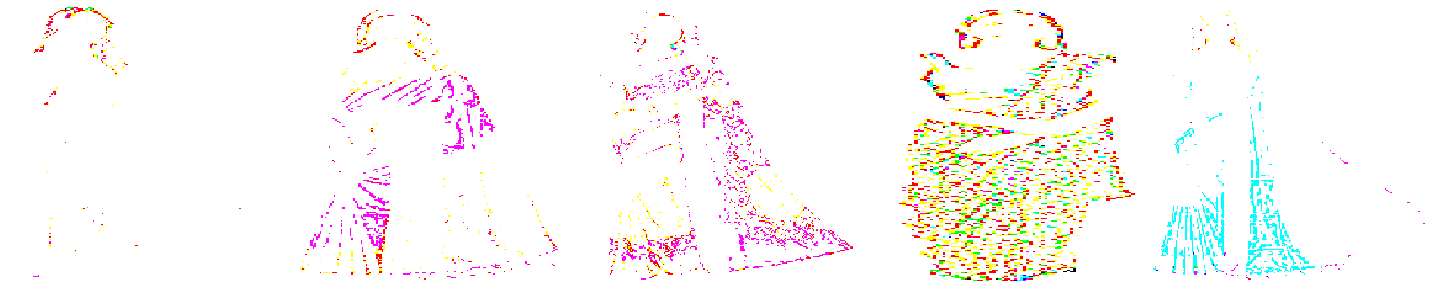

In [124]:
#Ploting Results    
plotImages(sample_training_images[:5])